Importing the necessary libraries and dependencies

In [159]:
import re
import numpy as np
import pandas as pd

In [160]:
#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [161]:
#nltk
from nltk.stem import WordNetLemmatizer

In [162]:
#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


Reading and loading the dataset

In [163]:
#importing the dataset
#column variable that contains a list of column names
DATASET_COLUMNS=['target','ids','date','flag','user','text']
#string containing the encoding type of the dataset
#ISO-8859-1 is widely used for latin alphabet languages
DATASET_ENCODING="ISO-8859-1"
df=pd.read_csv(r'C:\lux academy datacamp\Machine Learning\Twitter sentiment analysis\training.1600000.processed.noemoticon.csv\twitterdata.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

In [164]:
#return a random sample of 10 rows
df.sample(10)

,target,ids,date,flag,user,text
308580,0,2000712061,Mon Jun 01 22:46:03 PDT 2009,NO_QUERY,heartdog,my poor dog's itching has suddenly gone throug...
1555343,4,2185101516,Mon Jun 15 16:53:17 PDT 2009,NO_QUERY,stellar_k,@laurenglennon studying = the man's way of con...
446423,0,2068411400,Sun Jun 07 14:02:07 PDT 2009,NO_QUERY,lil_galilee,haha... Bethanys cake looks delicous.. we got ...
862530,4,1676912366,Fri May 01 23:41:02 PDT 2009,NO_QUERY,karyncristina,Cold in my house. Must go cuddle in bed. With ...
937358,4,1793204695,Thu May 14 01:46:55 PDT 2009,NO_QUERY,SunOC,"@Thesss Thanx, love."
571417,0,2208823727,Wed Jun 17 09:40:26 PDT 2009,NO_QUERY,NuLambda,@gorgeousikon florida for the summer?!?! Noooo...
1378462,4,2052015713,Fri Jun 05 23:24:59 PDT 2009,NO_QUERY,Kaleysar,@romantivist hilarious indeed! glad you got t...
234086,0,1979511153,Sun May 31 03:21:52 PDT 2009,NO_QUERY,corky1994,"last day of revision today, exams 2moro, hist ..."
43619,0,1676583623,Fri May 01 22:29:44 PDT 2009,NO_QUERY,fibonaccispiral,eh...i guess i'll try to sleep. Immunology fi...
1165215,4,1979829542,Sun May 31 04:40:29 PDT 2009,NO_QUERY,kahler,@pctutes After having viewed the full demo vid...


Exploratory Data Analysis

Understanding the data

In [165]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [166]:
df.tail()

,target,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [167]:
df.shape

(1600000, 6)

In [168]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [169]:
len(df)

1600000

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [171]:
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [172]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [173]:
#checking for unique target values
df['target'].unique()

array([0, 4], dtype=int64)

Data Visualization

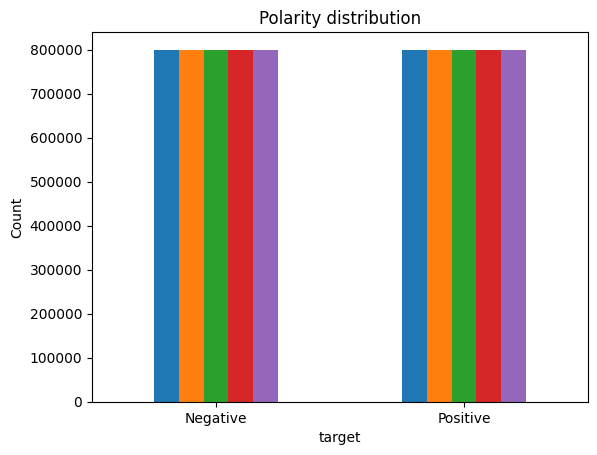

In [174]:
#using bargraphs to check the polarity distribution of the tweets
fig=df.groupby('target').count().plot(kind='bar', title='Polarity distribution',legend=False)
fig.set_xticklabels(['Negative','Positive'], rotation=0)
fig.set_ylabel('Count')
#storing data in lists
text,sentiment= list(df['text']),list(df['target'])



Text(0.5, 1.0, 'Countplot for polarity')

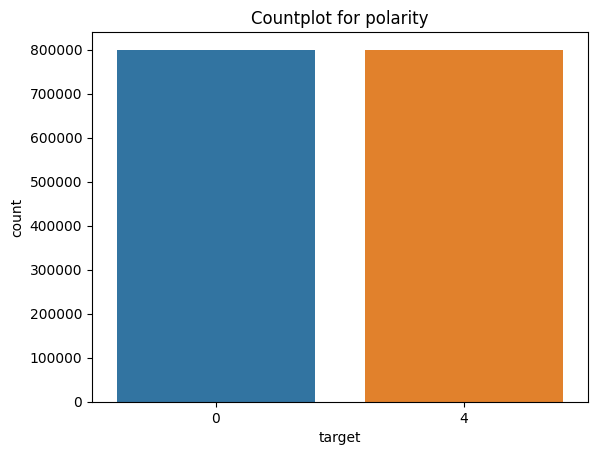

In [175]:
sns.countplot(x='target',data=df)
plt.title('Countplot for polarity')

Data Preprocessing
This process involves removing punctuations,repeating characters,emojis, stopwords, and other unnecessary noise. 
The text is also converted to lowercase for convenience.
Stemming-reducing words to their derived stems.
Lemmtization-reducing derived words to their root form/lemma.

In [176]:
#Selecting the text and data columns
data=df[['text','target']]

In [177]:
#Replacing the value representing postive from 4 to 1 for easier understanding
data['target']=data['target'].replace(4,1)

C:\Users\user\AppData\Local\Temp\ipykernel_7176\1233494619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']=data['target'].replace(4,1)


In [178]:
#to check if the replacement actually happened
data.sample(10)

,text,target
867301,(@nicarmstrong) Going to the Canucks game toni...,1
875781,"@trapezoid Neil, do you know when the next sea...",1
1221886,@salmonday Saw this and thought of you - http...,1
181791,and omg BGT totally distracted me from writing...,0
272235,isPlayer Has Died! Sorry,0
776473,@eemaree aww there aren't any of those here H...,0
180487,I lost the earphones for my phone a couple of ...,0
938200,Haha i slept for 8 hours today and now it's al...,1
179343,goodness gracious my chair broke,0
968010,Just spilled potato salad all over my keyboard...,1


In [179]:
data['target'].unique()

array([0, 1], dtype=int64)

In [180]:
#separating negative and postive tweets
data_pos=data[data['target']==1]
data_neg=data[data['target']==0]


In [181]:
#choosing 1/4 of the data to use
#iloc fn is used to select specific rows and columns in the dataset
#selecting the first 20000 rows
data_pos=data_pos.iloc[:int(20000)]
data_neg=data_pos.iloc[:int(20000)]

In [182]:
#combining postive and negative tweets
data_clean=pd.concat([data_pos, data_neg])

In [183]:
#making all text to be in lowercase
data_clean['text']=data_clean['text'].str.lower()
data_clean['text'].head()

800000         i love @health4uandpets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @darealsunisakim thanks for the twitter add, s...
800003    being sick can be really cheap when it hurts t...
800004      @lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [184]:
#removing punctuation
import string
def removing_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))
data_clean['text']=data_clean['text'].apply(lambda x: removing_punctuation(x))
data_clean['text'].head()
    

800000            i love health4uandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004       lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [185]:
#removing urls
#urls with http/https
data_clean['text']=data_clean['text'].apply(
    lambda x: re.sub(r'https?:\/\/\s+','',x)    
)
#urls without http(s) but with or without www
data_clean['text']=data_clean['text'].apply(
    lambda x: re.sub(r'www\.[a-z]?\.?(com)+|[a-z]+\.(com)','',x)
)
data_clean['text'].head()



800000            i love health4uandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004       lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [186]:
data_clean['text'].tail()

819995      we just met some awesome people at tgi fridays 
819996    oh my goodness  my feet are the most sensitive...
819997                                      heyangy hahaha 
819998    lamartian30 pfft school is koo im ranked 2nd i...
819999    stuffed working out showermovie night thn slee...
Name: text, dtype: object

In [187]:
#removing repeating characters
data_clean['text']=data_clean['text'].apply(
    lambda x:re.sub(r'(.)1+',r'1',x)
)
data_clean['text'].tail()

819995      we just met some awesome people at tgi fridays 
819996    oh my goodness  my feet are the most sensitive...
819997                                      heyangy hahaha 
819998    lamartian30 pfft school is koo im ranked 2nd i...
819999    stuffed working out showermovie night thn slee...
Name: text, dtype: object

In [188]:
#removing stopwords
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
data_clean['text']=data_clean['text'].apply(lambda x: "".join(x for x in x.split() if x not in stop_words))
data_clean['text'].head()

800000                        lovehealth4uandpetsuguysrbest
800001           immeetingonebestiestonightcantwaitgirltalk
800002    darealsunisakimthankstwitteraddsunisagotmeethi...
800003    sickreallycheaphurtsmucheatrealfoodplusfriends...
800004                         lovesbrooklyn2effecteveryone
Name: text, dtype: object

In [189]:
#removing numbers
data_clean['text']=data_clean['text'].apply(
    lambda x: re.sub('[0-9]+','',x)
)
data_clean['text'].head()


800000                         lovehealthuandpetsuguysrbest
800001           immeetingonebestiestonightcantwaitgirltalk
800002    darealsunisakimthankstwitteraddsunisagotmeethi...
800003    sickreallycheaphurtsmucheatrealfoodplusfriends...
800004                          lovesbrooklyneffecteveryone
Name: text, dtype: object

In [215]:
data_clean['text'].dropna(inplace=True)
data_clean['text']=data_clean['text'].astype(str)
data_clean['text'].head()

800000                 []
800001              ['w']
800002    ['w', 'w', 'w']
800003                 []
800004                 []
Name: text, dtype: object

In [216]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
data_clean['text'] = data_clean['text'].apply(tokenizer.tokenize)
data_clean['text'].head()
  

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [206]:
import nltk
stm=nltk.PorterStemmer()
def stemming_on_text(data):
    text = [stm.stem(word) for word in data]
    return data
data_clean['text']= data_clean['text'].apply(lambda x: stemming_on_text(x))
data_clean['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [207]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data_clean['text'] = data_clean['text'].apply(lambda x: lemmatizer_on_text(x))
data_clean['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

It can be observed that i still have a problem tokenizing, stemming and lematizing the text column in the dataframe.
Alternative methods will be researched and necessary changes committed.

In [209]:
x=data.text
y=data.target
print(y)

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


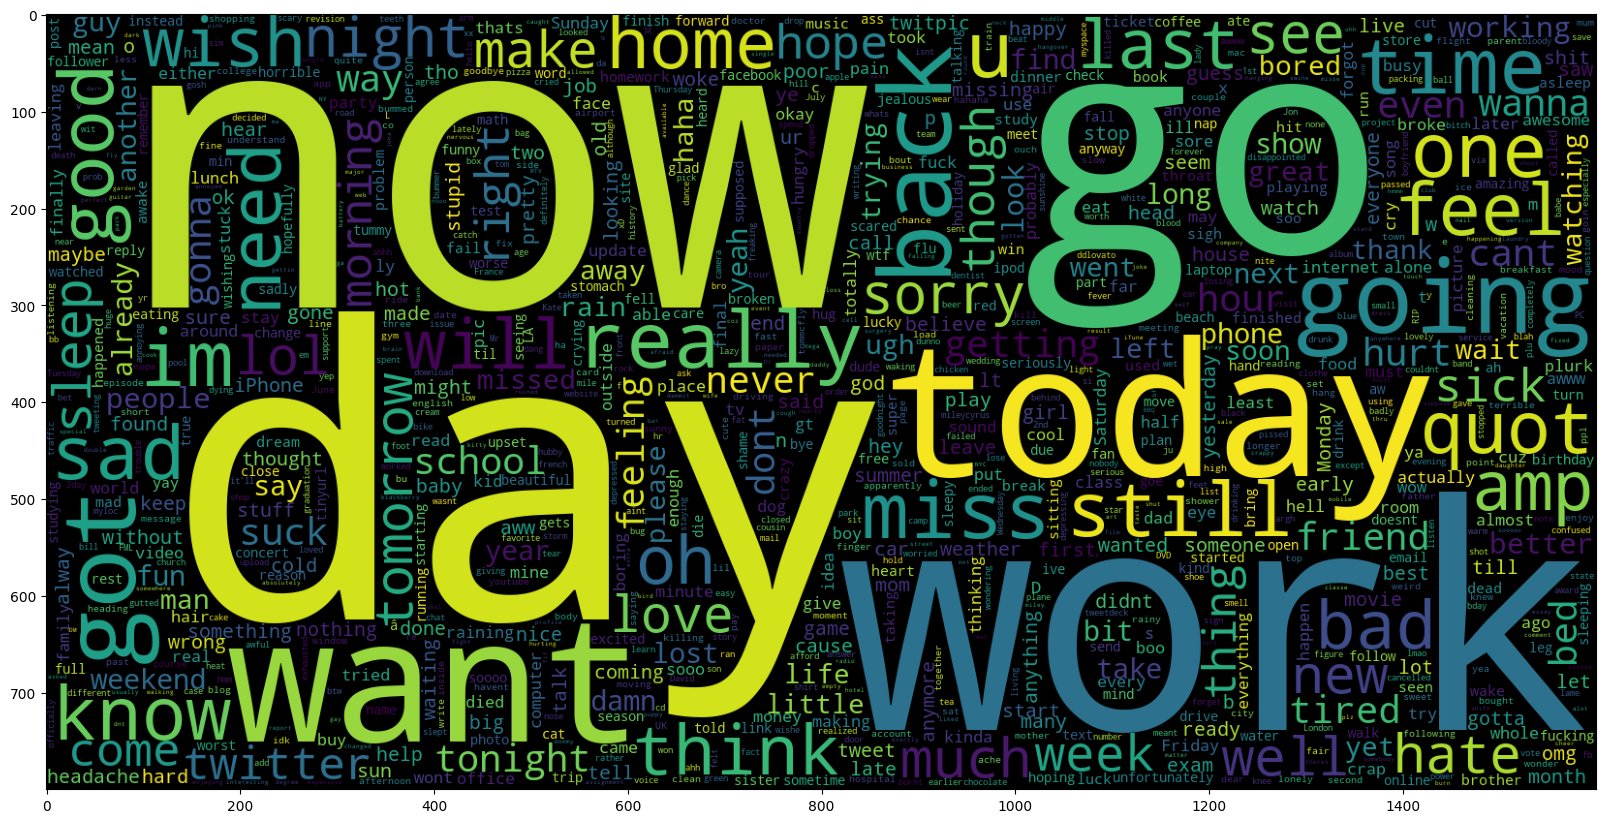

In [210]:
data_neg=data['text'][:800000]
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000, width=1600,height=800,collocations=False).generate("".join(data_neg))
plt.imshow(wc)


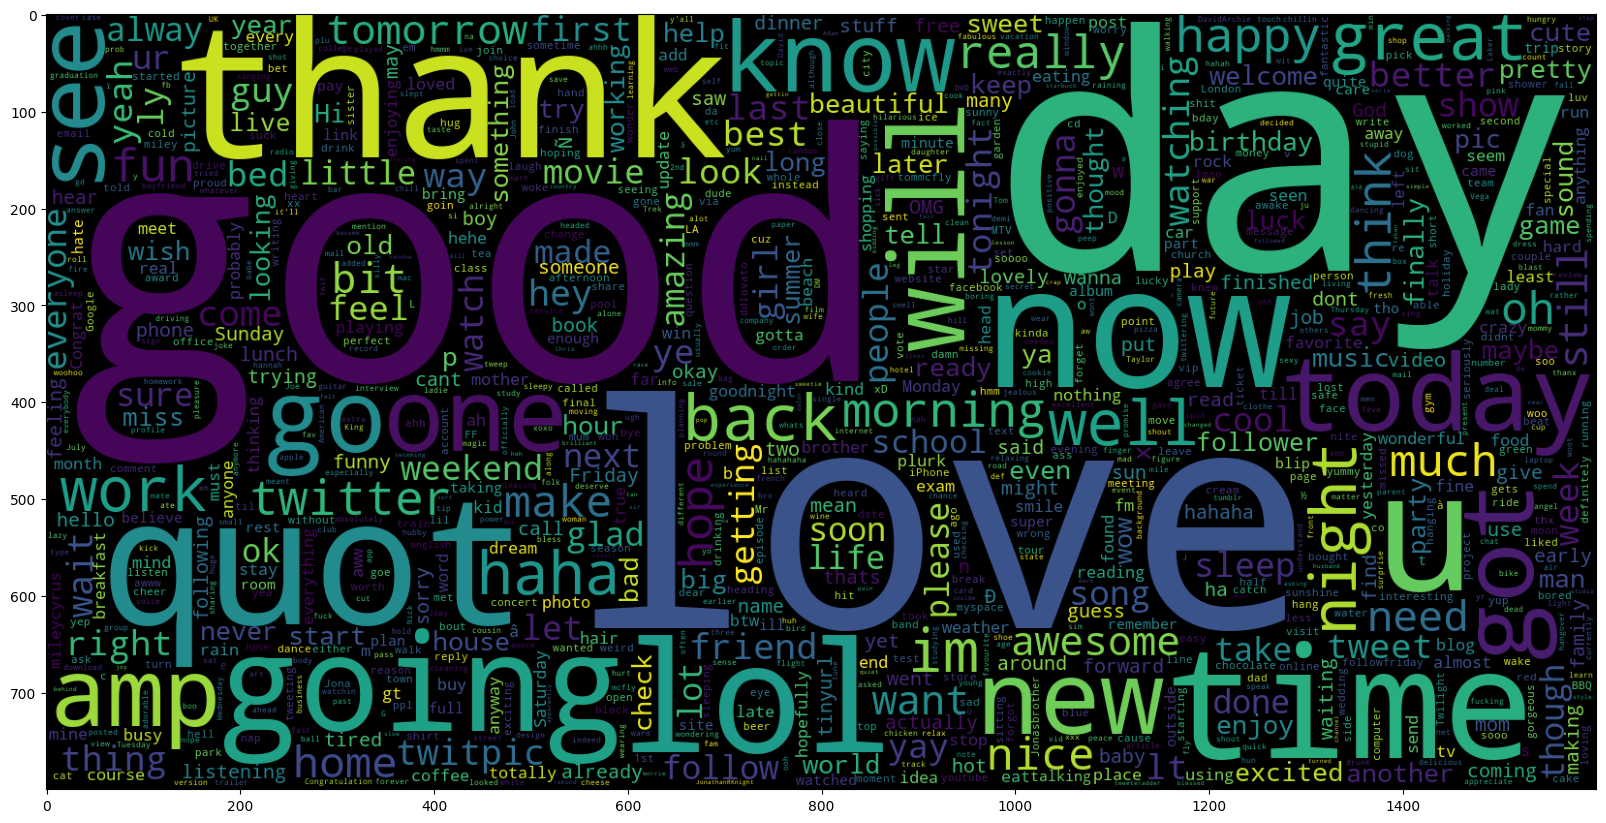

In [211]:
data_pos=data['text'][800000:]
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000, width=1600,height=800,collocations=False).generate("".join(data_pos))
plt.imshow(wc)

Splitting data into train and test sets

In [212]:
#training data is 90% and test data is 10%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=26105111)

Transforming the dataset using TF-IDF Vectorizer

In [219]:
#unigrams and bigrams
vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=500000)
#learn vocabulary and idf from traininng set
vectorizer.fit(x_train)
print('Number of feature words: ',len(vectorizer.get_feature_names_out()))

Number of feature words:  500000


In [220]:
#Transforming the data 
x_train=vectorizer.transform(x_train)
x_test=vectorizer.transform(x_test)


Model Evaluation
-To check how the model is performing
-Parameters to check:Accuracy Score, Confusion MATRIX WITH PLOT,ROC-AUC Curve

In [223]:
#model evaluation function
def evaluate_model(model):
    #predict values for the test dataset
    y_pred=model.predict(x_test)
    #print the evaluation metrics for the dataset
    print(classification_report(y_test,y_pred))
    #compute and plot confusion matrix
    cfm=confusion_matrix(y_test,y_pred)
    categories=['Negative','Positive']
    group_names=['TN','FP','FN','TP']
    group_percentages=['{0:.2%}'.format(value) for value in cfm.flatten() / np.sum(cfm)]
    labels=[f'{v1}n{v2}' for v1,v2 in zip(group_names,group_percentages)]
    labels=np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cfm,annot=labels,cmap='Blues',fmt='',xticklabels=categories,yticklabels=categories)
    plt.xlabel("Predicted values",fontdict={'size':14},labelpad=10)
    plt.ylabel("Actual values",fontdict={'size':14},labelpad=10)
    plt.title("Confusion matrix",fontdict={'size':18},pad=20)
    
    

Model Building
models to be used include:
-Bernoulli Naive Bayes Classifier
-SVM (Support Vector Machine)
-Logistic Regression

Model 1-Bernoulli Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     80200
           1       0.79      0.81      0.80     79800

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



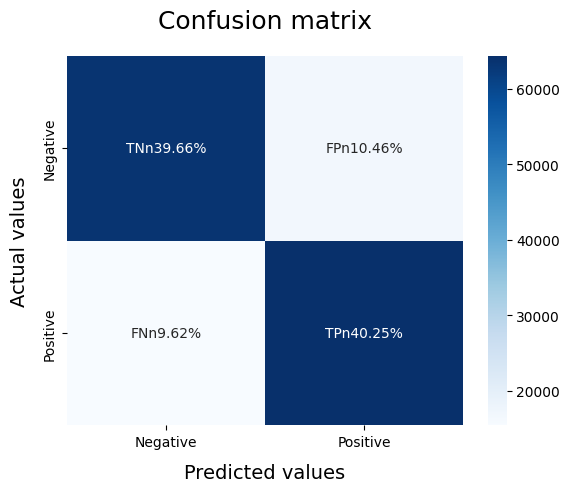

In [224]:
BNBmodel=BernoulliNB()
BNBmodel.fit(x_train,y_train)
evaluate_model(BNBmodel)
y_pred1=BNBmodel.predict(x_test)

Plotting the ROC-AUC curve for model1

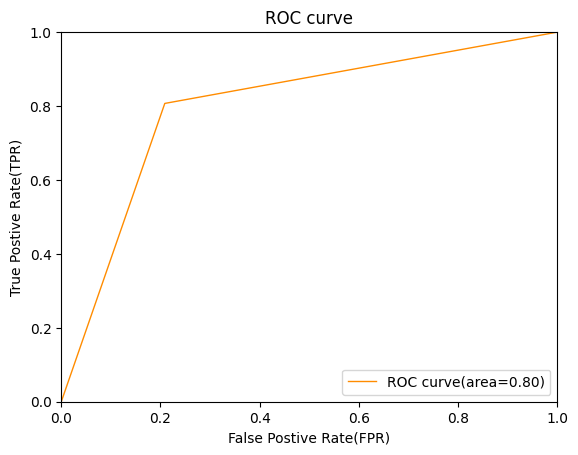

In [227]:
from sklearn.metrics import roc_curve,auc 
fpr,tpr,thresholds=roc_curve(y_test,y_pred1)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=1,label='ROC curve(area=%0.2f)'%roc_auc)
plt.xlim([0.0,1.0])
plt.xlabel('False Postive Rate(FPR)')
plt.ylim([0.0,1.0])
plt.ylabel('True Postive Rate(TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Model2-SVM (Support Vector Machine)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     80200
           1       0.81      0.82      0.82     79800

    accuracy                           0.81    160000
   macro avg       0.81      0.81      0.81    160000
weighted avg       0.81      0.81      0.81    160000



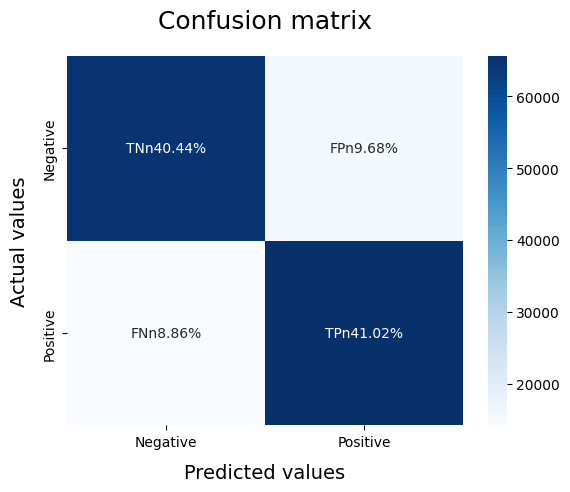

In [228]:
SVCmodel=LinearSVC()
SVCmodel.fit(x_train,y_train)
evaluate_model(SVCmodel)
y_pred2=SVCmodel.predict(x_test)

ROC-AUC curve for the second model

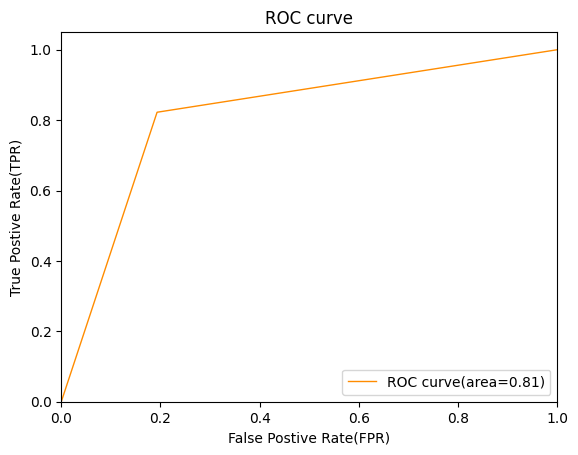

In [230]:
from sklearn.metrics import roc_curve,auc 
fpr,tpr,thresholds=roc_curve(y_test,y_pred2)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=1,label='ROC curve(area=%0.2f)'%roc_auc)
plt.xlim([0.0,1.0])
plt.xlabel('False Postive Rate(FPR)')
plt.ylim([0.0,1.05])
plt.ylabel('True Postive Rate(TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Model3-Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     80200
           1       0.82      0.83      0.83     79800

    accuracy                           0.83    160000
   macro avg       0.83      0.83      0.83    160000
weighted avg       0.83      0.83      0.83    160000



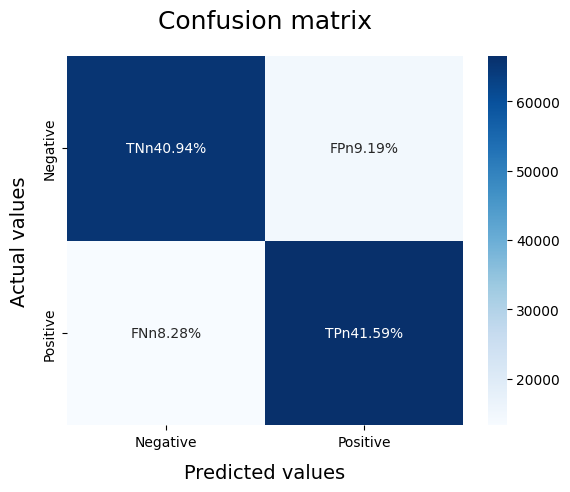

In [232]:
LRmodel=LogisticRegression(C = 2,max_iter=1000,n_jobs=-1)
LRmodel.fit(x_train,y_train)
evaluate_model(LRmodel)
y_pred3=LRmodel.predict(x_test)

ROC-AUC curve for the THIRD model

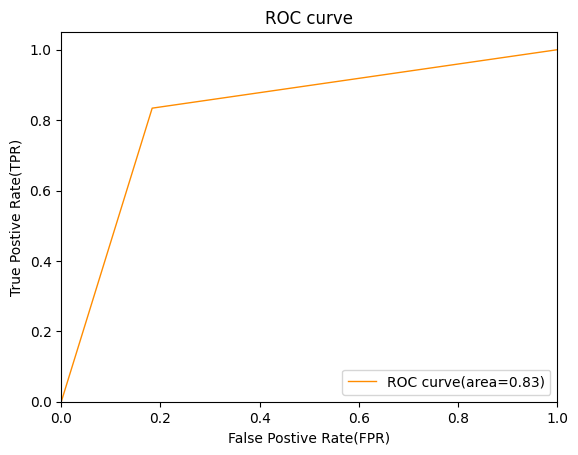

In [233]:
from sklearn.metrics import roc_curve,auc 
fpr,tpr,thresholds=roc_curve(y_test,y_pred3)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=1,label='ROC curve(area=%0.2f)'%roc_auc)
plt.xlim([0.0,1.0])
plt.xlabel('False Postive Rate(FPR)')
plt.ylim([0.0,1.05])
plt.ylabel('True Postive Rate(TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

OBSERVATIONS:
Considering the various classification metrics:
1.Accuracy
-The Logistic Regression model had the best score at 83%
-The SVM model came second with 81% 
-BNB model had the least score at 80%
2.AUC score
-It was observed that all three models had their AUC scores being similar to their accuracy scores
3.F1 Score
Class 0:
-The scores were as follows: BNBmodel< SVM< Logistic Regression
Class 1:
-The scores were as follows: BNBmodel< SVM < Logistic Regression
4.Precision
-When both classes are considered, the Logistic Regression model was the best performing model with the BNB being the least.
5.Recall
-When both classes are considered, the Logistic Regression model was the best performing model with the BNB being the least.

Conclusion:
The Logistic Regression is the  best model of the three for the given dataset.